Для выполнения работы взят Gender Classification Dataset: https://www.kaggle.com/elakiricoder/gender-classification-dataset

Определена задача классификации - определение гендера человека по некоторым признакам.

In [70]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('gender_classification.csv')
data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [2]:
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


В базе данных нет пустых ячеек, поэтому можно сразу начинать с ней работать.

In [3]:
data.nunique()

long_hair                     2
forehead_width_cm            42
forehead_height_cm           21
nose_wide                     2
nose_long                     2
lips_thin                     2
distance_nose_to_lip_long     2
gender                        2
dtype: int64

In [4]:
data["gender"] = data["gender"].astype("category")

Выведем графики отношений между всеми парами переменных:

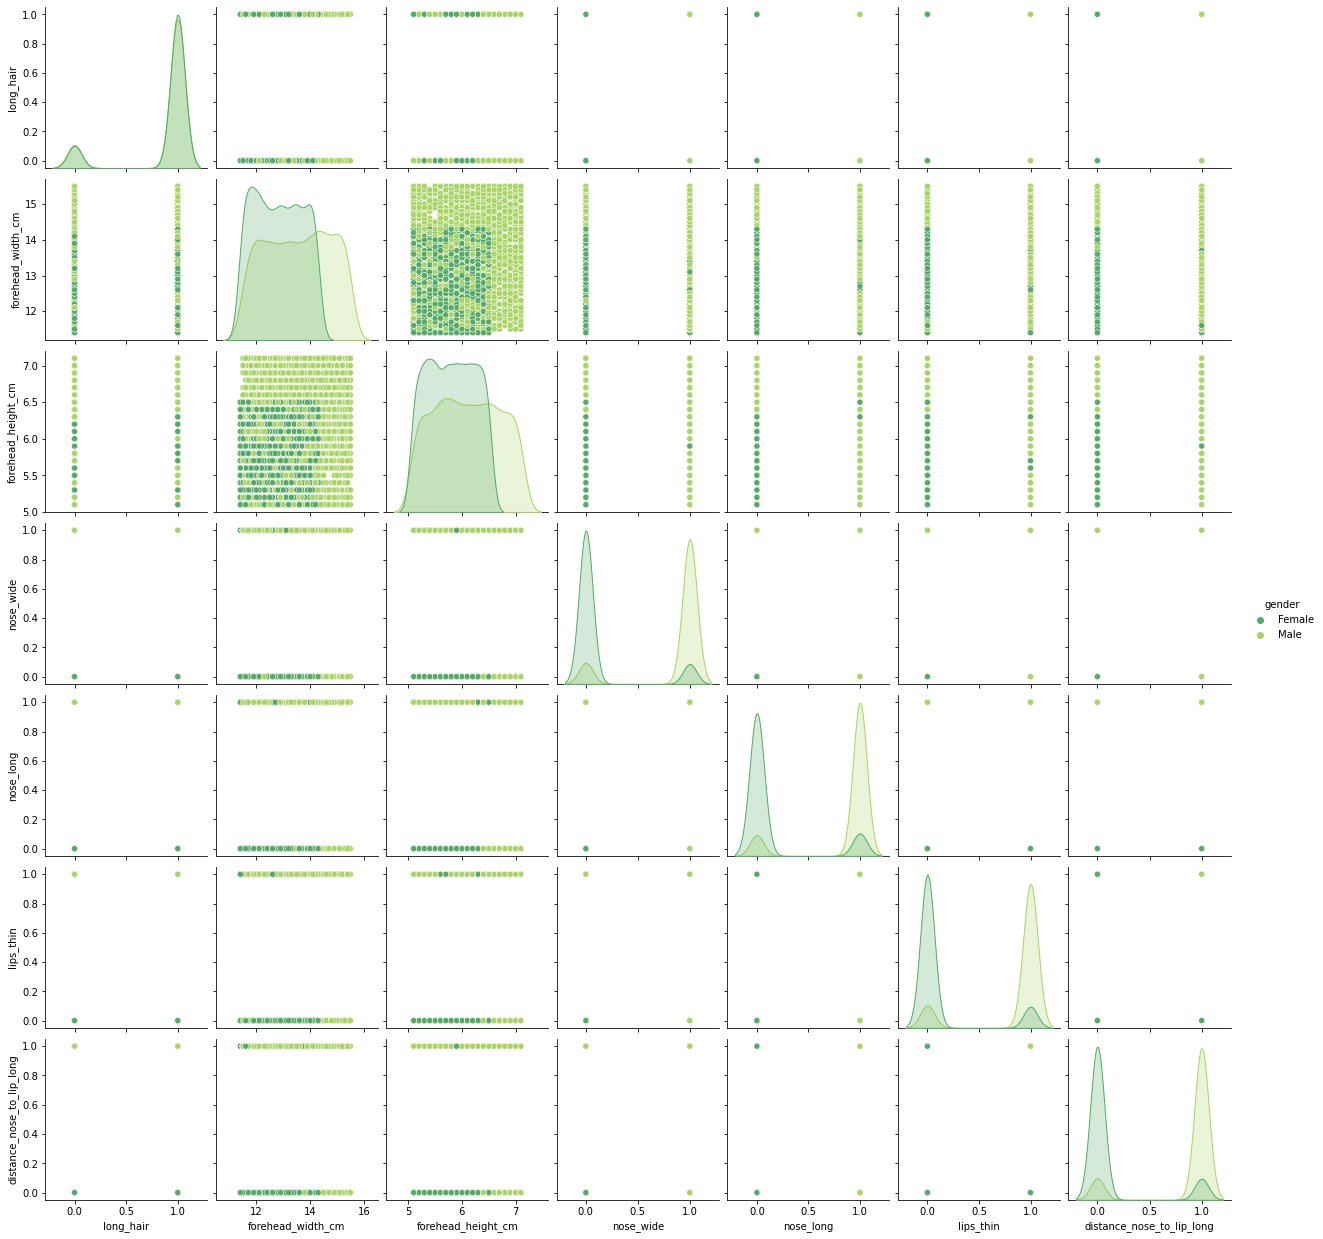

In [5]:
sns.pairplot(data, hue = 'gender',palette='summer')

Выведем график зависимости между гендером и длиной волос:

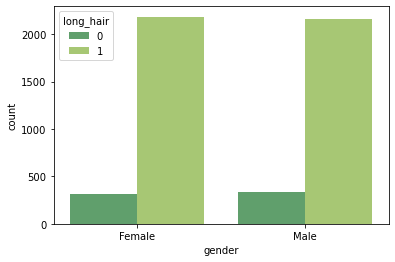

In [6]:
sns.countplot(x="gender", hue = "long_hair",
data = data, palette='summer');

Как мы видим, значения почти не отличаются, поэтому можно характеризовать признак "long_hair" как несущественный.

В то же время, если мы посмотрим корреляцию между "gender" и "nose_long", мы получим обратный результат: длинный нос встречается преимущественно у мужчин, короткий - у женщин. Этот признак существенно поможет нам в выполнении задания. График:

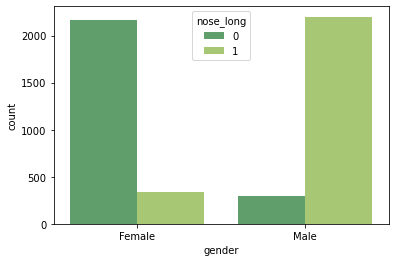

In [7]:
sns.countplot(x="gender", hue = "nose_long",
data = data, palette='summer');

Далее смотрим на количественные признаки. Их у нас всего два - ширина и высота лба. Из графиков далее видно, что диапазон значений этих признаков для женщин и мужчин не одинаковый - у мужчин в среднем лоб шире и выше.

<AxesSubplot:xlabel='gender', ylabel='forehead_height_cm'>

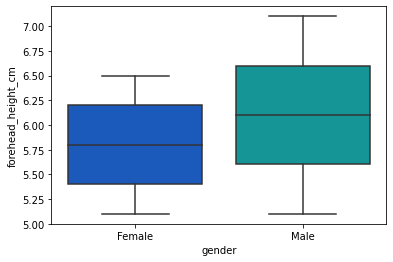

In [8]:
sns.boxplot(x="gender", y="forehead_height_cm", data=data, palette="winter")

<AxesSubplot:xlabel='gender', ylabel='forehead_width_cm'>

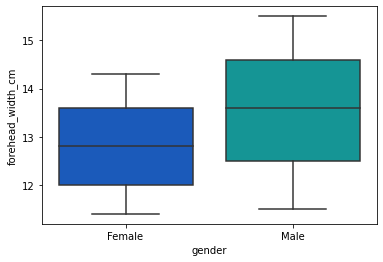

In [9]:
sns.boxplot(x="gender", y="forehead_width_cm", data=data, palette="winter")

Посмотрим на распределение в базе данных людей, имеющих те или иные значения признаков "forehead_width_cm" и "forehead_height_cm":

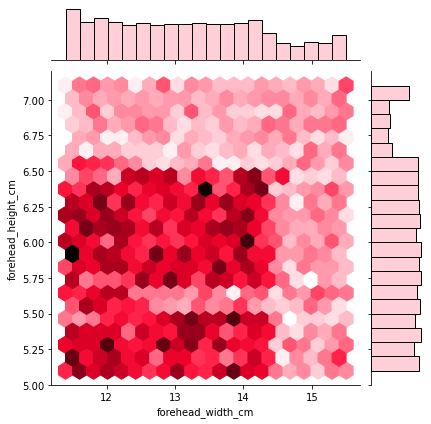

In [10]:
sns.jointplot(x = 'forehead_width_cm', y = 'forehead_height_cm', data = data, kind = 'hex', color = 'pink')

Можем сделать вывод о том, что в нашей базе люди преимущественно имеют средние и маленькие значения этих признаков.

Из следующего графика мы можем узнать, что у мужчин чаще встречается широкий и длинный нос, у женщин наоборот:

<AxesSubplot:xlabel='gender', ylabel='nose_wide'>

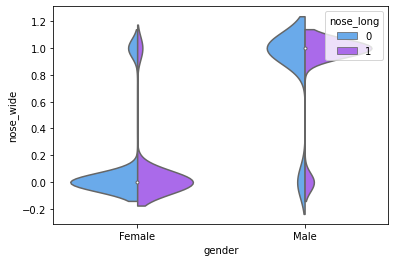

In [11]:
sns.violinplot(x = 'gender', y = 'nose_wide',data=data,hue='nose_long',split=True, palette="cool")

Выведем матрицу корреляции признаков:

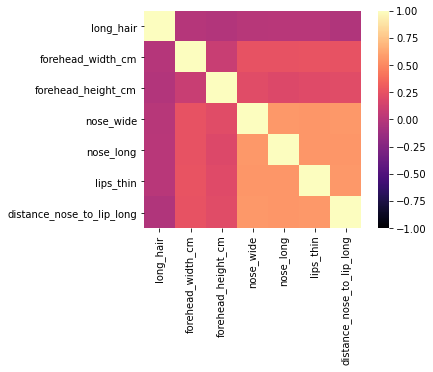

In [12]:
corr_mat = data.corr()
sns.heatmap(corr_mat, square=True, vmin=-1,
vmax=1, cmap='magma')
pass

По матрице видно, что длина волос практически не имеет корреляции ни с одним из признаков. Мы уже делали вывод ранее о том, что признак "long_hair" не является значимым для нахождения решения. Остальные признаки имеют ту или иную положительную корреляцию.

Подготовим данные для решения задачи классификации.

Меняем значения в столбце gender: Male = 1, Female = 0.

In [13]:
from sklearn import preprocessing
number = preprocessing.LabelEncoder()
data['gender']= number.fit_transform(data.gender)
data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


# Набор признаков №1

Для начала попробуем поработать со всеми признаками, которые нам даны.

Делим датасет на тестовую и обущающую выборки. 30% данных идет в тестовую выборку.

In [14]:
X = data.drop(columns=['gender'])
Y = data['gender']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=4)

# Набор признаков №2

Исключим некоторые признаки и сделаем вывод о влиянии количества признаков на эффективность работы алгоритмов машинного обучения.

В данном наборе не будет long_hair, forehead_width_cm и nose_long.

In [31]:
X = data.drop(columns=['gender', 'long_hair', 'forehead_width_cm','nose_long'])
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=4)

# Набор признаков №3

В данном наборе призкаки forehead_width_cm и forehead_height_cm будут заменены на признак forehead, одержащий произведения их значений для каждой строки

In [46]:
X = data.drop(columns=['gender'])
Y = data['gender']

X['forehead'] = pd.Series(X['forehead_width_cm'] * X['forehead_height_cm'],index=X.index)
X = X.drop(columns=['forehead_height_cm','forehead_width_cm'])
X.head()

,long_hair,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,forehead
0,1,1,0,1,1,71.98
1,0,0,0,1,0,75.60
2,0,1,1,1,1,74.34
3,0,0,1,1,1,87.84
4,1,0,0,0,0,79.65


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=4)

# Набор признаков №4


Включим в набор попарные взаимодействия признаков.

Для категориальных признаков меняем тип на object

In [71]:
data["distance_nose_to_lip_long"] = data["distance_nose_to_lip_long"].astype("object")
data["lips_thin"] = data["lips_thin"].astype("object")
data["nose_long"] = data["nose_long"].astype("object")
data["nose_wide"] = data["nose_wide"].astype("object")
data["long_hair"] = data["long_hair"].astype("object")

data.columns[data.dtypes == "object"]
for cal in data.columns[data.dtypes == "object"]:
    data[cal] = data[cal].apply(str)
    

x_interact = data.drop(columns=['gender'])
y_interact = data['gender']

Добавляем попарные взаимодействия.

In [63]:
cat_features = x_interact.columns[x_interact.dtypes == "object"]
for i, col1 in enumerate(cat_features):
    for j, col2 in enumerate(cat_features[i + 1:]):
        x_interact[col1 + "_" + col2] = x_interact[col1] + "_" + x_interact[col2]


In [64]:
x_interact.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,long_hair_nose_wide,long_hair_nose_long,long_hair_lips_thin,long_hair_distance_nose_to_lip_long,nose_wide_nose_long,nose_wide_lips_thin,nose_wide_distance_nose_to_lip_long,nose_long_lips_thin,nose_long_distance_nose_to_lip_long,lips_thin_distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1,1_1,1_0,1_1,1_1,1_0,1_1,1_1,0_1,0_1,1_1
1,0,14.0,5.4,0,0,1,0,0_0,0_0,0_1,0_0,0_0,0_1,0_0,0_1,0_0,1_0
2,0,11.8,6.3,1,1,1,1,0_1,0_1,0_1,0_1,1_1,1_1,1_1,1_1,1_1,1_1
3,0,14.4,6.1,0,1,1,1,0_0,0_1,0_1,0_1,0_1,0_1,0_1,1_1,1_1,1_1
4,1,13.5,5.9,0,0,0,0,1_0,1_0,1_0,1_0,0_0,0_0,0_0,0_0,0_0,0_0


In [72]:
X_train, X_test, y_train, y_test = train_test_split(x_interact,y_interact,test_size=0.3, random_state=4)